In [1]:
import os 
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir("..")

In [4]:
%config InlineBackend.figure_format = 'retina'

In [13]:
results_file = "data/epi/peak_count_AGG_ATAC_results.h5ad"

In [7]:
METADATA_PATH = "/Users/mukkab/Documents/PhD/snATAC-seq/CZI/Metadata/sample_randomizer_metadata.csv"
GEM_TO_NGI_ID = {"1" : "P20056_1001",
                "2" : "P20056_1002",
                "3" : "P20056_1003",
                "4" : "P20056_1004", 
                "5" : "P20057_1001",
                "6" : "P20057_1002",
                "7" : "P20057_1003"}
NGI_ID_TO_GEM = {v: k for k, v in GEM_TO_NGI_ID.items()}

In [5]:
adata = ad.read("data/epi/peak_count_matrix.h5ad")
adata

AnnData object with n_obs × n_vars = 19062 × 265635

In [8]:
bcd_list = adata.obs_names.to_list()
NGI_ID_list = [GEM_TO_NGI_ID[bcd.split("-")[-1]] for bcd in bcd_list] 
adata.obs["NGI_ID"] = NGI_ID_list

meta = pd.read_csv(METADATA_PATH, sep=",")
meta = meta[meta["NGI_ID"].notna()]

sample_attributes = meta.columns.to_list()
rem_ = ["NGI_ID", "Box", "10XATAC_batch"]
for i in rem_:
    sample_attributes.remove(i)

#populates anndata.obs
for attribute in sample_attributes:
    adata.obs[attribute] = [meta.loc[meta.NGI_ID == i, attribute].iloc[0] for i in NGI_ID_list]

In [9]:
adata.obs

NGI_ID  ProcessNumber    caseNO Tissue Sex   Age  \
AAACGAAAGAGGTACC-7  P20057_1003             61  SD042/18    BA4   F  73.0   
AAACGAAAGGCGACTA-2  P20056_1002             23  SD046/16     CB   M  42.0   
AAACGAAAGTGCACAG-2  P20056_1002             23  SD046/16     CB   M  42.0   
AAACGAAAGTTCCAGT-4  P20056_1004             12  SD025/17     CB   M  73.0   
AAACGAAAGTTGCGCC-2  P20056_1002             23  SD046/16     CB   M  42.0   
...                         ...            ...       ...    ...  ..   ...   
TTTGTGTTCGGGACAA-4  P20056_1004             12  SD025/17     CB   M  73.0   
TTTGTGTTCGGTGATT-4  P20056_1004             12  SD025/17     CB   M  73.0   
TTTGTGTTCGTTCTAT-3  P20056_1003             67  SD041/19     CB   F  40.0   
TTTGTGTTCTAAGGTC-4  P20056_1004             12  SD025/17     CB   M  73.0   
TTTGTGTTCTCTTCTC-3  P20056_1003             67  SD041/19     CB   F  40.0   

                      PMI      MK_ID  10X_BATCH  NGS_BATCH  
AAACGAAAGAGGTACC-7   74.0  210122Mk1        3.0        2.0  
AAACGAAAGGCGACTA-2  103.0  210121Mk1        2.0        1.0  
AAACGAAAGTGCACAG-2  103.0  210121Mk1        2.0        1.0  
AAACGAAAGTTCCAGT-4   66.0  210122Mk2        3.0        1.0  
AAACGAAAGTTGCGCC-2  103.0  210121Mk1        2.0        1.0  
...                   ...        ...        ...        ...  
TTTGTGTTCGGGACAA-4   66.0  210122Mk2        3.0        1.0  
TTTGTGTTCGGTGATT-4   66.0  210122Mk2        3.0        1.0  
TTTGTGTTCGTTCTAT-3   72.0  210121Mk2        2.0        1.0  
TTTGTGTTCTAAGGTC-4   66.0  210122Mk2        3.0        1.0  
TTTGTGTTCTCTTCTC-3   72.0  210121Mk2        2.0        1.0  

[19062 rows x 10 columns]

In [10]:
epi.pp.binarize(adata)

In [11]:
adata.raw = adata

In [14]:
adata.write(results_file)

... storing 'NGI_ID' as categorical
... storing 'caseNO' as categorical
... storing 'Tissue' as categorical
... storing 'Sex' as categorical
... storing 'MK_ID' as categorical


In [17]:
adata.obs["log_nb_features"] = [np.log10(x) for x in adata.obs["nb_features"]]

In [16]:
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

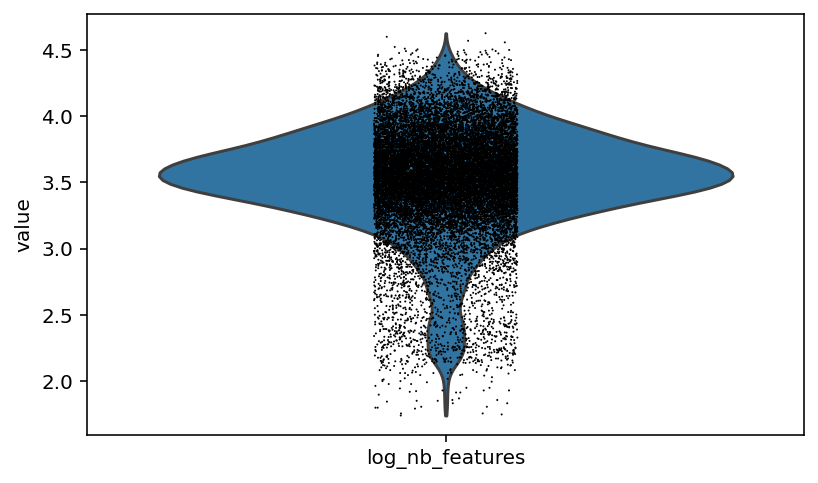

In [20]:
epi.pl.violin(adata, ["log_nb_features"])

In [21]:
min_features = np.quantile(adata.obs["nb_features"], 0.1) # filter out lowest 10% of cells
epi.pp.filter_cells(adata, min_features=min_features) 
adata.raw = adata

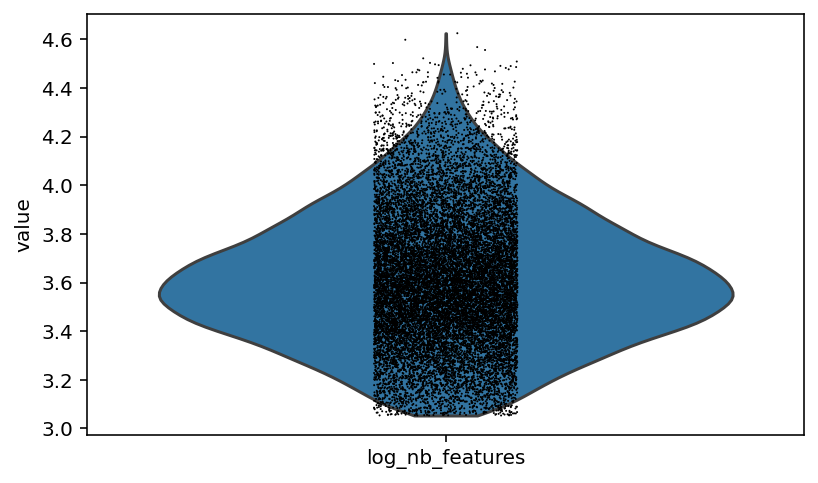

In [22]:
epi.pl.violin(adata, ["log_nb_features"])

In [123]:
adata_MK_norm = adata ## make a copy of adata

AnnData object with n_obs × n_vars = 17394 × 264215
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'
    layers: 'binary'

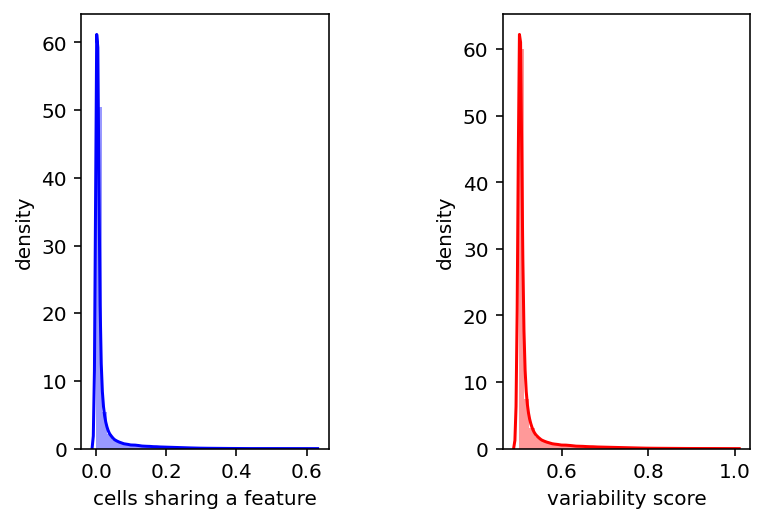

In [23]:
epi.pp.cal_var(adata)

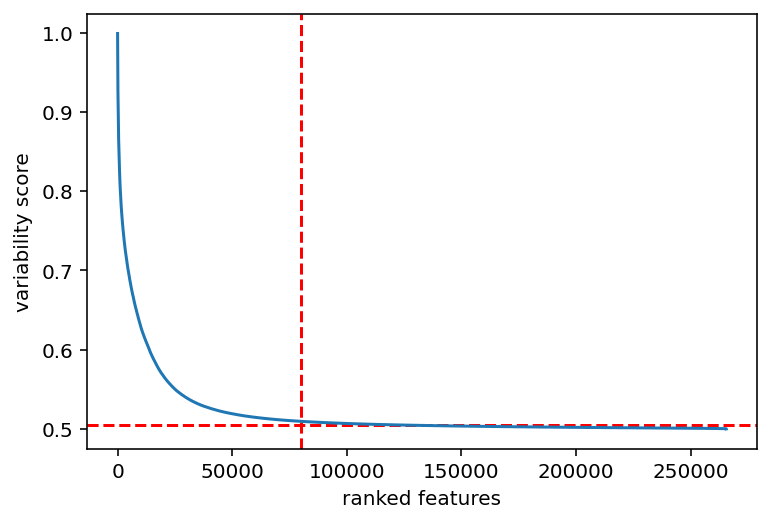

In [27]:
min_score_value = 0.505
nb_feature_selected = 80000

epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                           save="data/epi/QC-plots/peak-mtx_variable_features_plot.png")

In [28]:
# save the current matrix in the raw layer
adata.raw = adata

In [29]:
adata = epi.pp.select_var_feature(adata,
                                 nb_features=nb_feature_selected,
                                 show = False,
                                 copy=True)

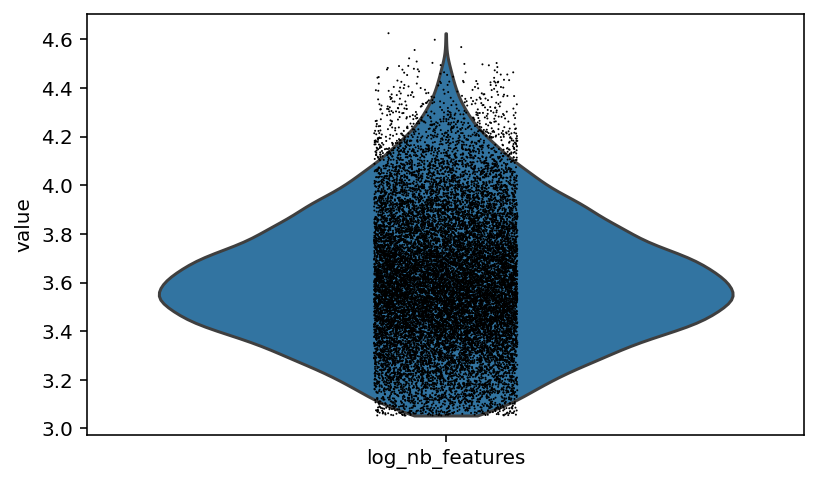

In [30]:
epi.pl.violin(adata, ['log_nb_features'])

In [32]:
adata

View of AnnData object with n_obs × n_vars = 17155 × 80276
    obs: 'NGI_ID', 'ProcessNumber', 'caseNO', 'Tissue', 'Sex', 'Age', 'PMI', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'prop_shared_cells', 'variability_score'

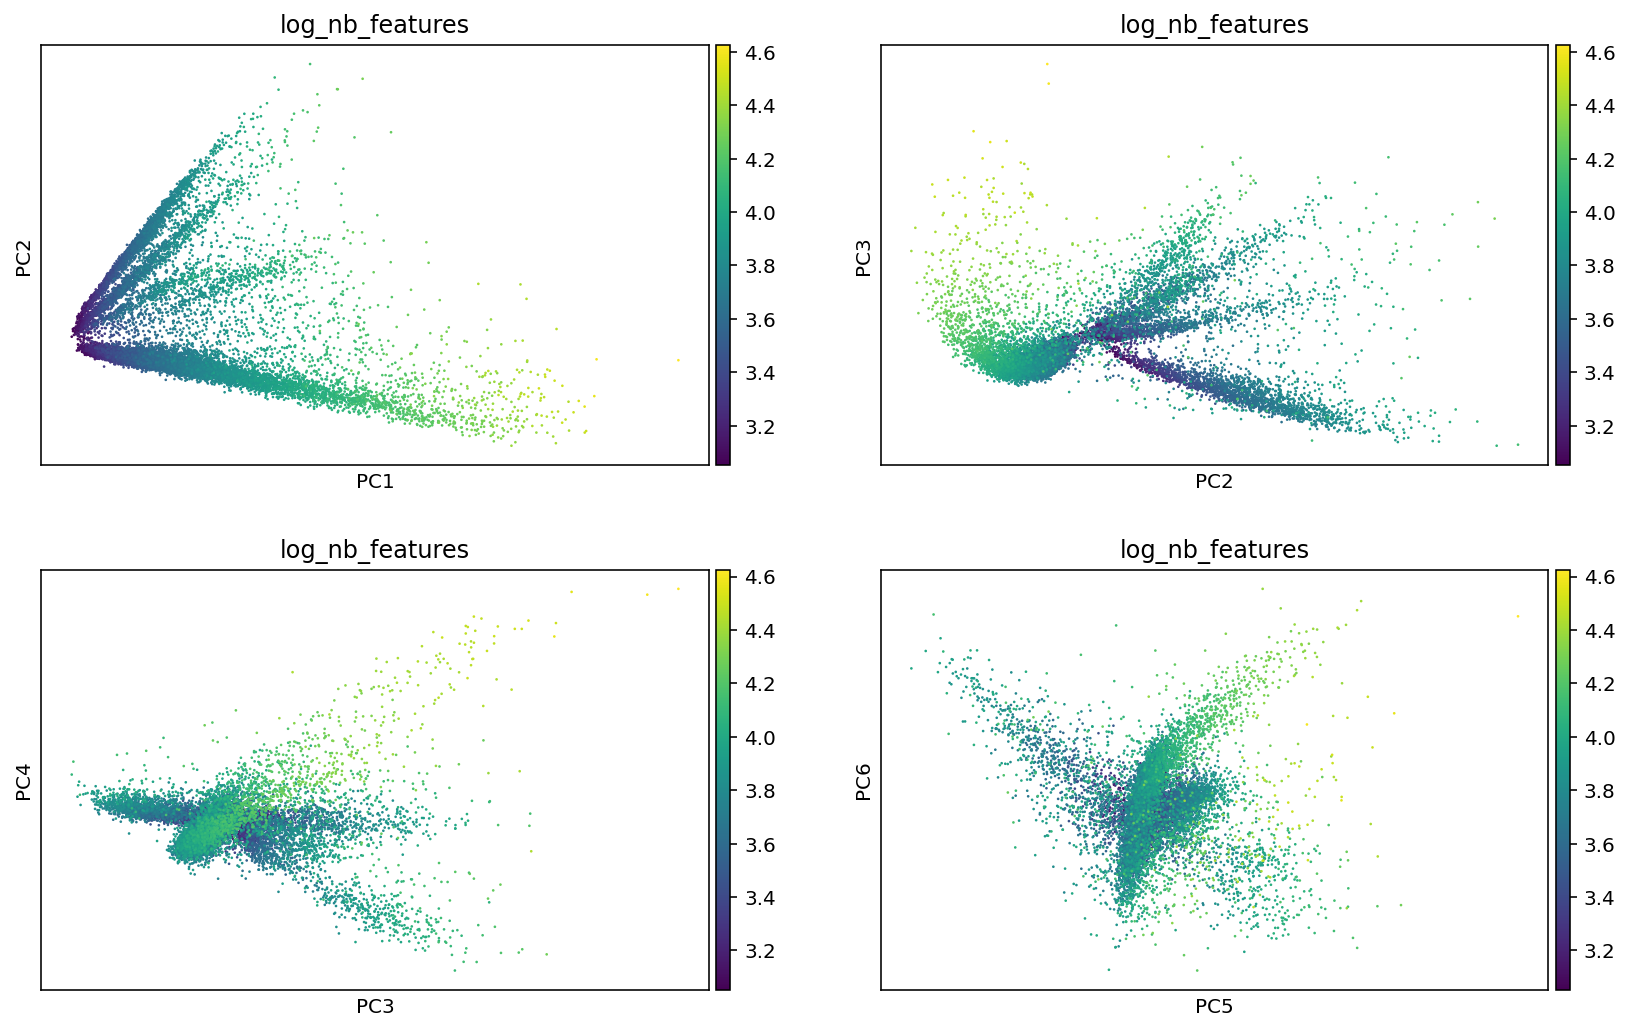

In [33]:
sc.tl.pca(adata, zero_center=False, n_comps=50)
sc.pl.pca(adata, color='log_nb_features', components = ['1,2','2,3','3,4','5,6'], ncols=2)

In [36]:
epi.pp.normalize_total(adata)

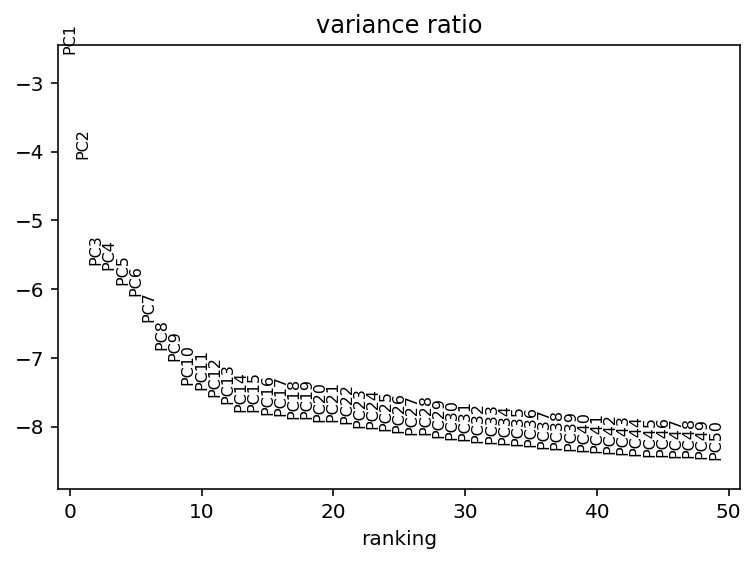

In [34]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [37]:
adata

AnnData object with n_obs × n_vars = 17155 × 80276
    obs: 'NGI_ID', 'ProcessNumber', 'caseNO', 'Tissue', 'Sex', 'Age', 'PMI', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'prop_shared_cells', 'variability_score'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [41]:
sc.pp.neighbors(adata, n_pcs = 20, n_neighbors = 15)

In [44]:
sc.tl.umap(adata, n_components=10)

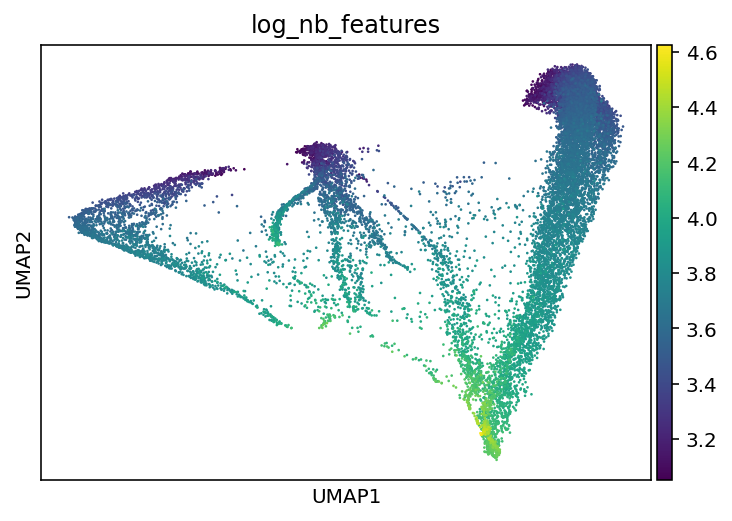

In [45]:
sc.pl.umap(adata, color=["log_nb_features"])

In [162]:
adata

AnnData object with n_obs × n_vars = 14063 × 75188
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'umap', 'Tissue_colors', 'NGI_ID_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'MK_normalized', 'normalised'
    obsp: 'distances', 'connectivities'

In [163]:
epi.tl.louvain(adata)

... storing 'ArchR_doublet' as categorical


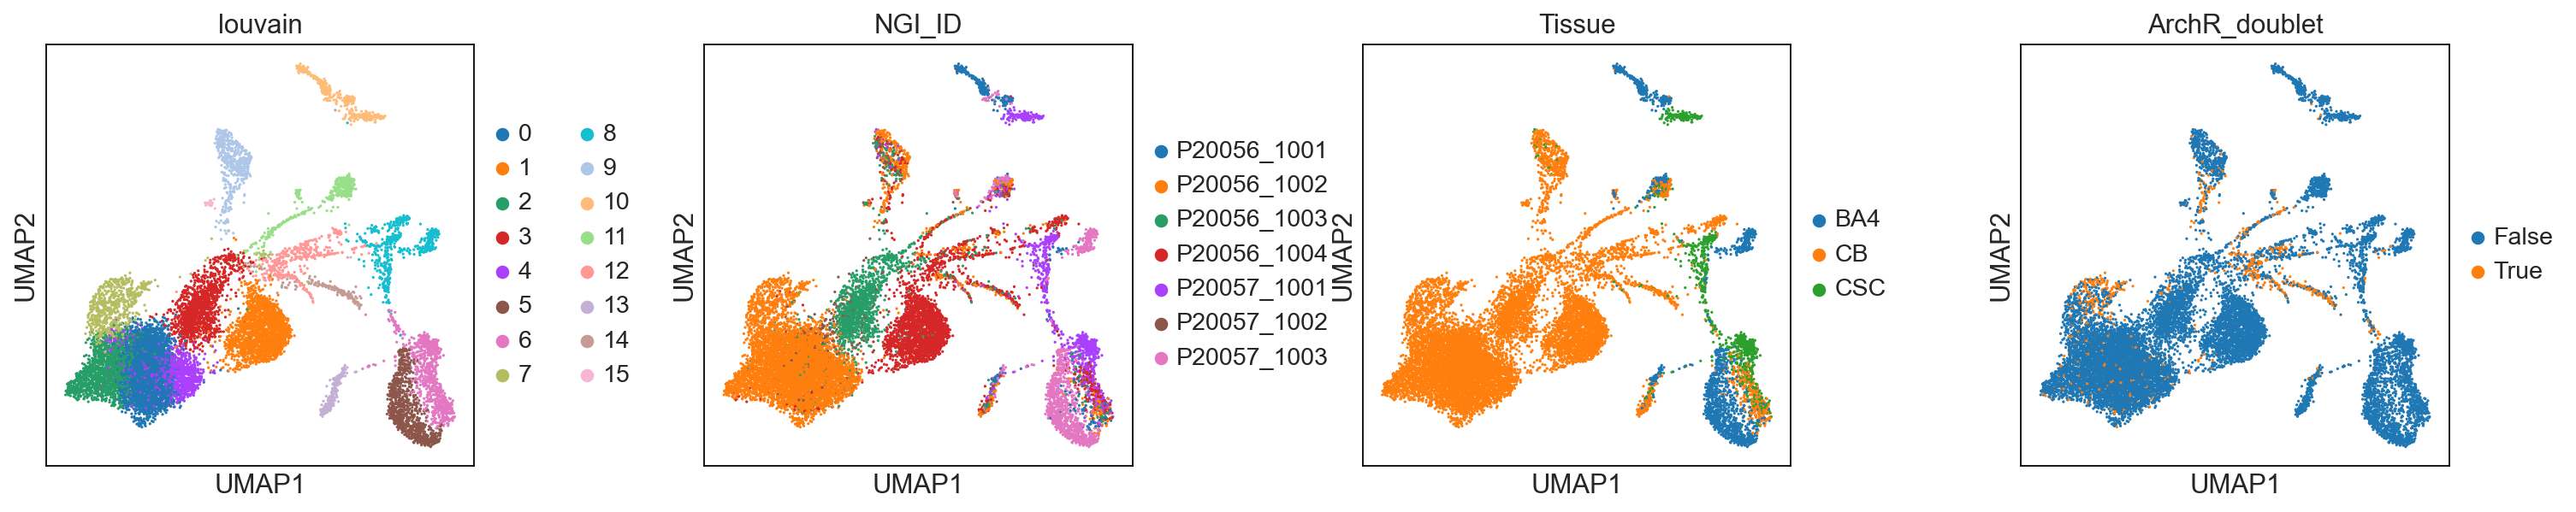

In [251]:
epi.pl.umap(adata, color=['louvain', 'NGI_ID', 'Tissue', 'ArchR_doublet'], wspace=0.4)

In [56]:
epi.pp.lazy(adata)

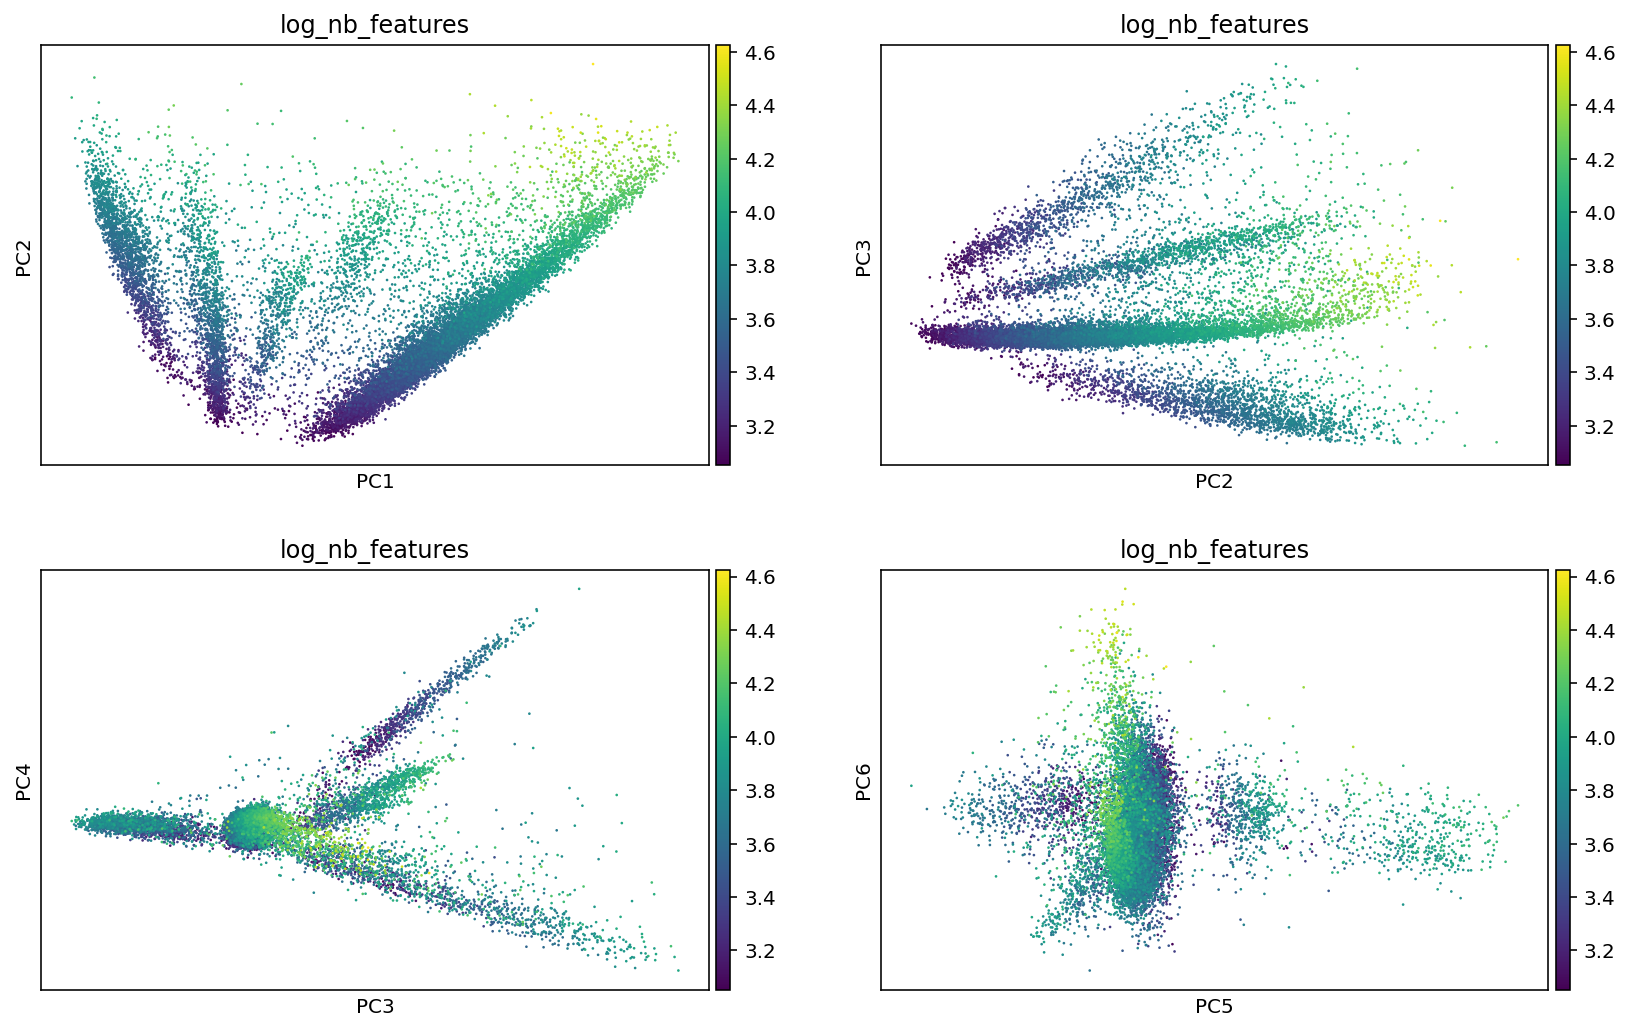

In [57]:
sc.pl.pca(adata, color='log_nb_features', components = ['1,2','2,3','3,4','5,6'], ncols=2)

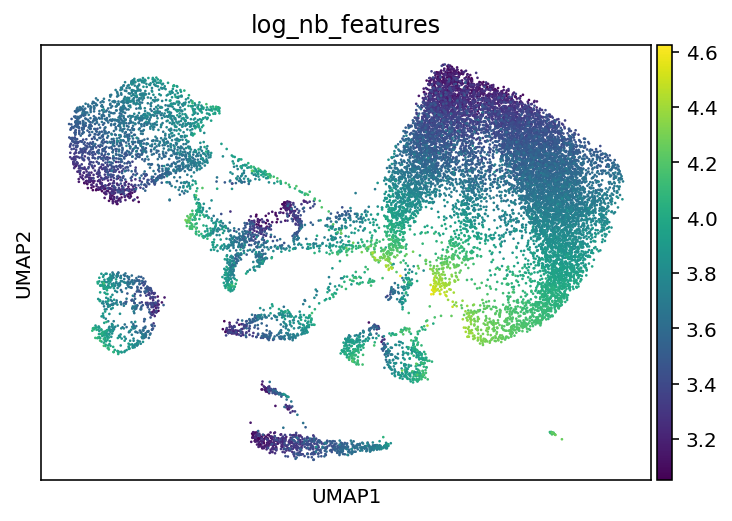

In [58]:
epi.pl.umap(adata, color=['log_nb_features'], wspace=0.4)

### Run TFIDF + SVD

In [46]:
adata_MK_norm = adata ## make a copy of adata

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer ## used this instead of my custom function

In [48]:
X = adata_MK_norm.X

In [49]:
## do the TF-IDF
tfidf = TfidfTransformer(use_idf=True)
X_norm = tfidf.fit_transform(X)

In [50]:
adata_MK_norm.X = X_norm

In [51]:
sc.tl.pca(adata_MK_norm,  zero_center=False, n_comps=50)

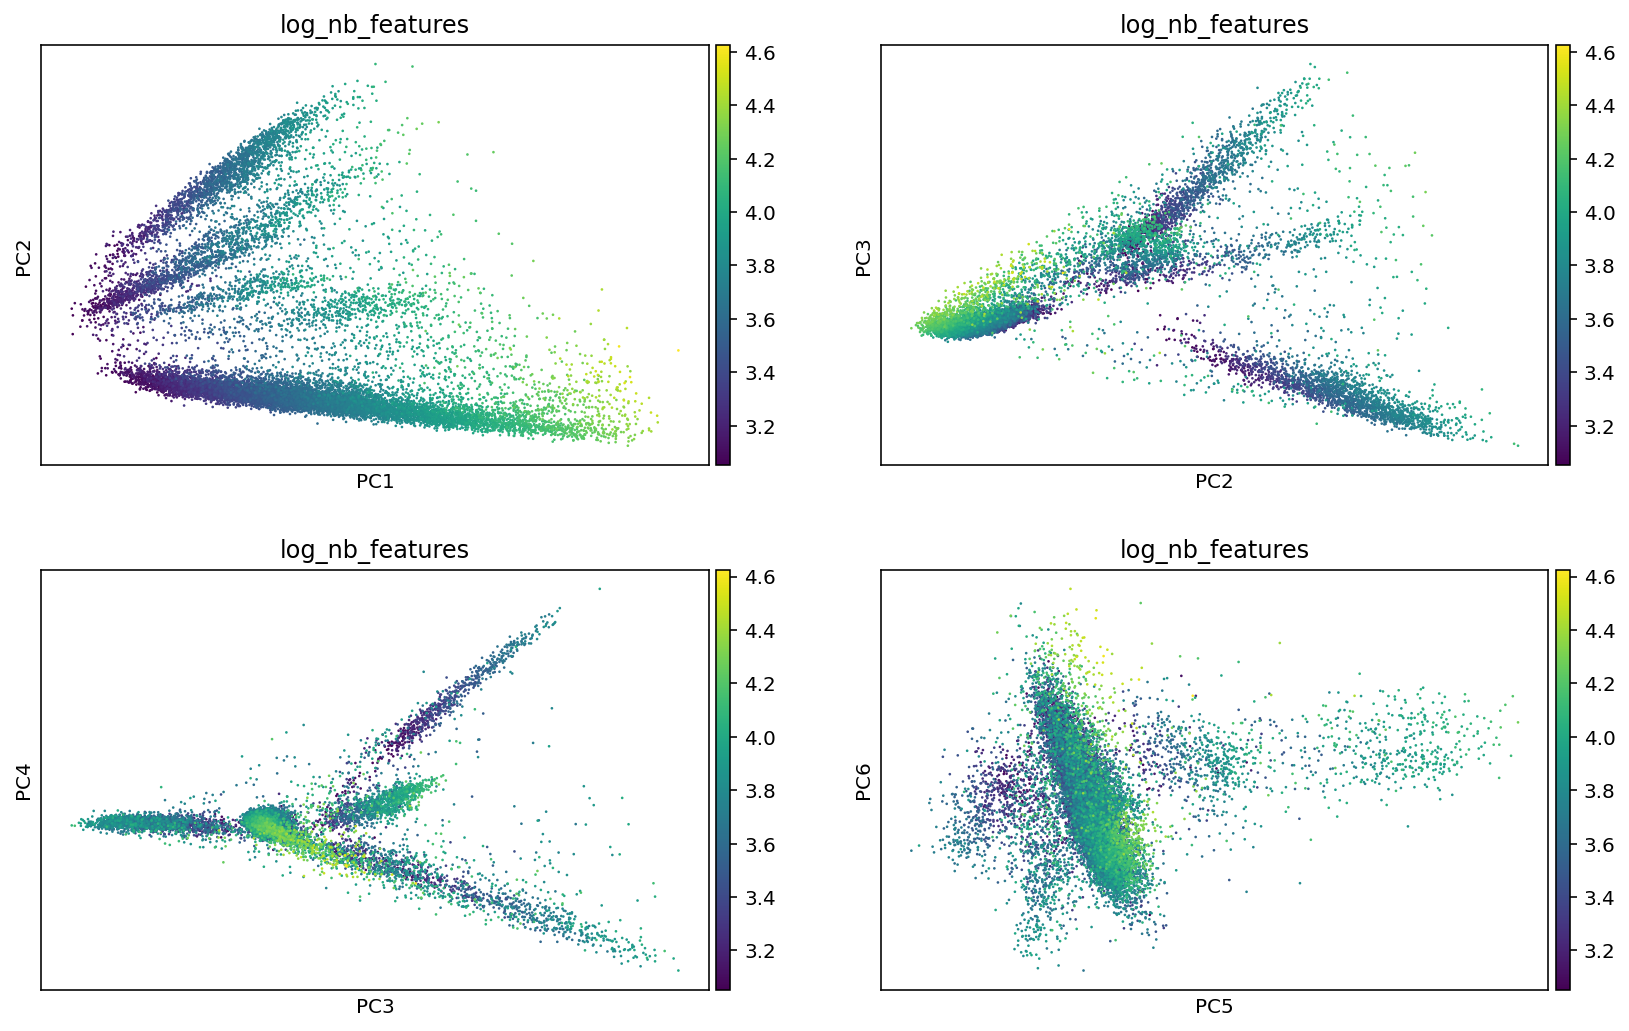

In [52]:
sc.pl.pca(adata_MK_norm, color='log_nb_features', components = ['1,2','2,3','3,4','5,6'], ncols=2)

In [59]:
sc.pp.neighbors(adata_MK_norm, n_pcs = 50, n_neighbors = 15)

In [60]:
sc.tl.umap(adata_MK_norm, n_components=30)

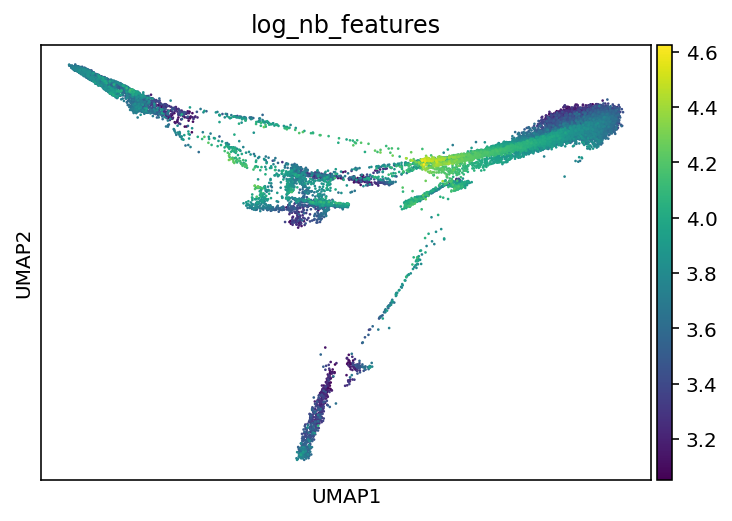

In [61]:
sc.pl.umap(adata_MK_norm, color=["log_nb_features"])

In [66]:
adata_MK_norm

AnnData object with n_obs × n_vars = 17155 × 80276
    obs: 'NGI_ID', 'ProcessNumber', 'caseNO', 'Tissue', 'Sex', 'Age', 'PMI', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'umap', 'Tissue_colors', 'caseNO_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [62]:
sc.tl.umap(adata_MK_norm, n_components=2)

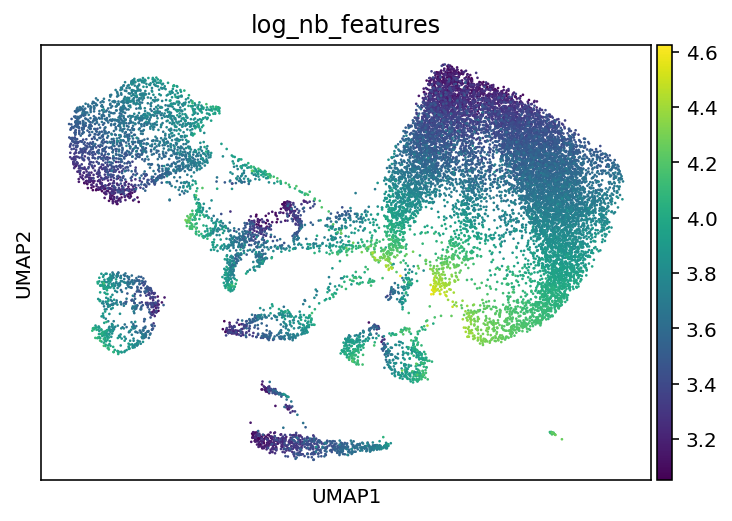

In [63]:
sc.pl.umap(adata_MK_norm, color=["log_nb_features"])

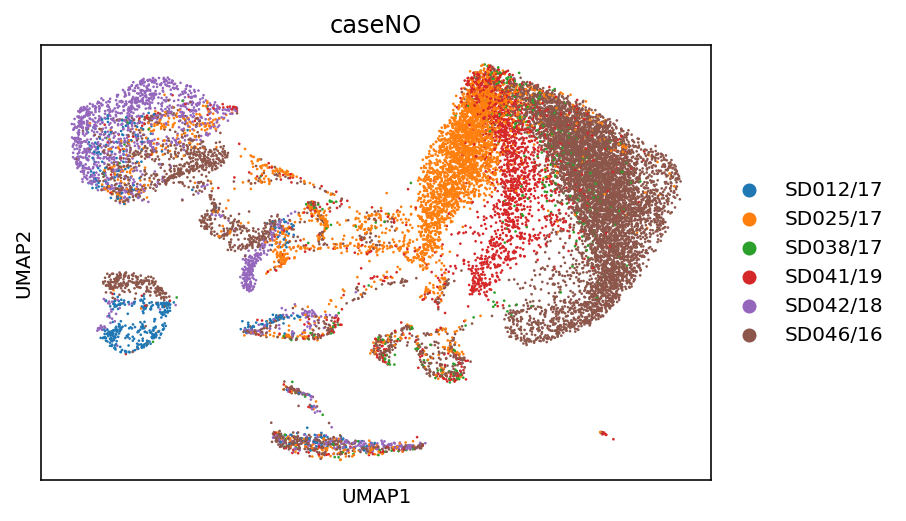

In [65]:
sc.pl.umap(adata_MK_norm, color=["caseNO"])